# Solar Axion Flux

## Initialization

### Imports

In [1]:
import SolarAxionPrimakoffFlux as sapf
import numpy as np
from matplotlib import pyplot as plt

### Preparation

In [2]:
unit = sapf.units_in_MeV(1) # eV = 1
keV = unit.keV
eV = unit.eV

π = np.pi

solar_data = sapf.solar_model()

g10 = 1e-10 / unit.GeV
flux_unit = sapf.flux_unit(1e10, unit)

## Main

In [3]:
photon_energy_list = np.linspace(.1*keV, 19*keV, 100)
axion_mass_list = np.linspace(0, 4*keV, 5)

In [4]:
dΦ_dE_list = [[sapf.solar_axion_flux(E, solar_data, unit=unit, g_aγ=g10, axion_mass=ma) for E in photon_energy_list] for ma in axion_mass_list]
dΦ_dE_approx_list = [[sapf.solar_axion_flux_approx(E, ma, A=5.87969014, α=2.51258793, β=1.1886825, γ=1.72173373, unit=unit) for E in photon_energy_list] for ma in axion_mass_list]
dΦ_dE_CAST2007 = [sapf.solar_axion_flux_CAST2007(E, unit=unit) for E in photon_energy_list]

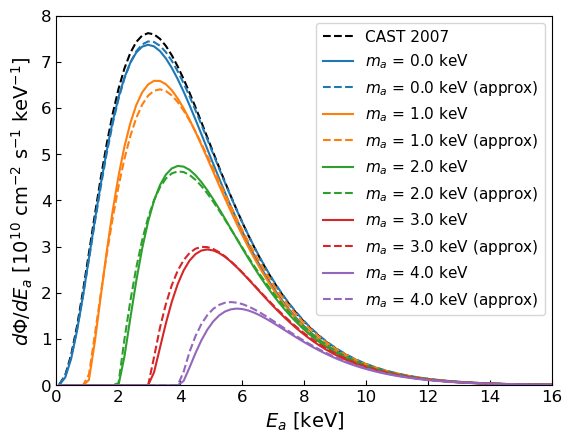

In [5]:
x_list = photon_energy_list / keV
plt.plot(x_list, np.array(dΦ_dE_CAST2007)/flux_unit, label="CAST 2007", color="black", linestyle="--")
for ii, ma in enumerate(axion_mass_list):
    tmp_color = "C" + str(ii)
    plt.plot(x_list, np.array(dΦ_dE_list[ii])/flux_unit, label=r"$m_a$ = "+f"{ma/keV:.1f} keV", color=tmp_color)
    plt.plot(x_list, np.array(dΦ_dE_approx_list[ii])/flux_unit, label=r"$m_a$ = "+f"{ma/keV:.1f} keV (approx)", color=tmp_color, linestyle="--")
# end for

plt.xlim(0, 16)
plt.ylim(0, 8)
plt.legend(fontsize=11)

plt.xlabel(r"$E_a$ [keV]", fontsize=14)
plt.ylabel(r"$d\Phi/dE_a$ [10$^{10}$ cm$^{-2}$ s$^{-1}$ keV$^{-1}$]", fontsize=14)
plt.gca().tick_params(axis="both", direction="in", which="both", labelsize=12)
plt.show()